<h1><center><b>Machine Learning</b></center></h1>

<h4><center>K-Means and PCA<center></h4>

## K-Means

In this part you will have to implement the K-Means algorithm that was learned in class.<br>
**The implementation will be based on the numpy package only.**

### **1. Useful packages**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


### **2. Data**

Generate a 2D dataset

In [ ]:
## Generate 2D data
X = np.concatenate([
    np.random.normal([0, 0], size=(500, 2)),
    np.random.normal([5, 5], size=(500, 2)),
    np.random.normal([5, 0], size=(500, 2)),
    np.random.normal([0, 5], size=(500, 2)),
])

# Shuffle the data
np.random.shuffle(X)

print(X.shape)

(2000, 2)


Plot the data to explore how many clusters it contains

<ipython-input-3-5d2f93b9a0ca>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap='viridis')


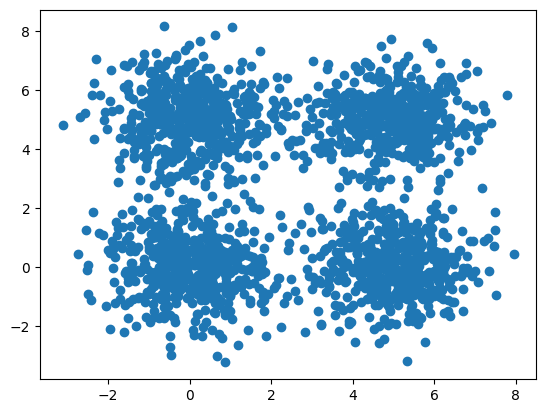

In [ ]:
plt.scatter(X[:, 0], X[:, 1], cmap='viridis')

### **3. K-Means**

Implement the algorithm

In [ ]:
class KMeans():
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

        ######## Helper fields #########
        self.X_fit_ = None      # Here you should store the dataset X.
                                # This can be useful for the next tasks.

        self.labels_ = None     # Here you should store the final labels.
                                # That is, the clusters indices for all the samples

        self.centroids = None   # Here you should store the final centroids.

        self.labels_history = []    # Here you should store the labels of each iteration.
                                    # This can also be useful later.

        self.centroids_history = [] # Here you should store the centroids of each iteration.
                                    # This can also be useful later.

        self.costs = []             # Here you should store the costs of the iterations.
                                    # That is, you should calculate the cost in every iteration
                                    # and store it in this list.

    def fit(self, X):
        self.X_fit_ = X
        # Initialize centroids randomly from the dataset
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        self.centroids_history.append(self.centroids.copy())

        for i in range(self.max_iter):
            self.labels_ = self._get_labels(X)
            self.labels_history.append(self.labels_)

            new_centroids = self._get_centroids(X, self.labels_)

            # Calculate and store cost
            cost = self._calculate_cost(X)
            self.costs.append(cost)

            # Check for convergence (if centroids do not change)
            if np.all(new_centroids == self.centroids):
                break

            self.centroids = new_centroids
            self.centroids_history.append(self.centroids.copy())

    def predict(self, X):
        return self._get_labels(X)

    def _get_distances(self, X):
        # Calculate the distance between each point and each centroid
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i in range(self.n_clusters):
            distances[:, i] = np.linalg.norm(X - self.centroids[i], axis=1)
        return distances

    def _get_labels(self, X):
        # Assign each point to the closest centroid
        distances = self._get_distances(X)
        return np.argmin(distances, axis=1)

    def _get_centroids(self, X, labels):
        # Calculate the new centroids as the mean of the points in each cluster
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            new_centroids[i] = X[labels == i].mean(axis=0)
        return new_centroids

    def _calculate_cost(self, X):
        # Calculate the cost (sum of squared distances to the nearest centroid)
        distances = self._get_distances(X)
        min_distances = np.min(distances, axis=1)
        cost = np.sum(min_distances ** 2)
        return cost

Run the algorithm on the 2D dataset

In [ ]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

Plot a graph of the costs as a function of the iterations

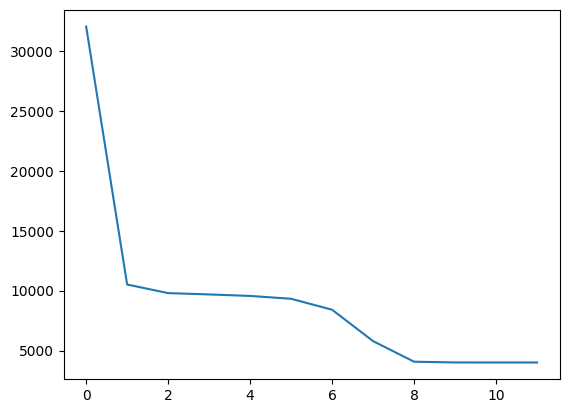

In [ ]:
costs = kmeans.costs
plt.plot(costs)

Now run the algorithm several more times with n_clusters = 2, 3, 4, 6, 8, 10, 20 and write **below** the **final** cost you got in each experiment.<br>

2 clusters: <br>
3 clusters: <br>
4 clusters: <br>
6 clusters: <br>
8 clusters: <br>
10 clusters: <br>
20 clusters: <br>

Now write a code that plots the clusters and the locations of the centroids at each iteration

2 clusters: 16709.44985847143
3 clusters: 9899.412206354955
4 clusters: 4006.3400812792493
6 clusters: 3272.2813508577647
8 clusters: 2681.946795781546
10 clusters: 2374.9680499411643
20 clusters: 1196.3134946907696


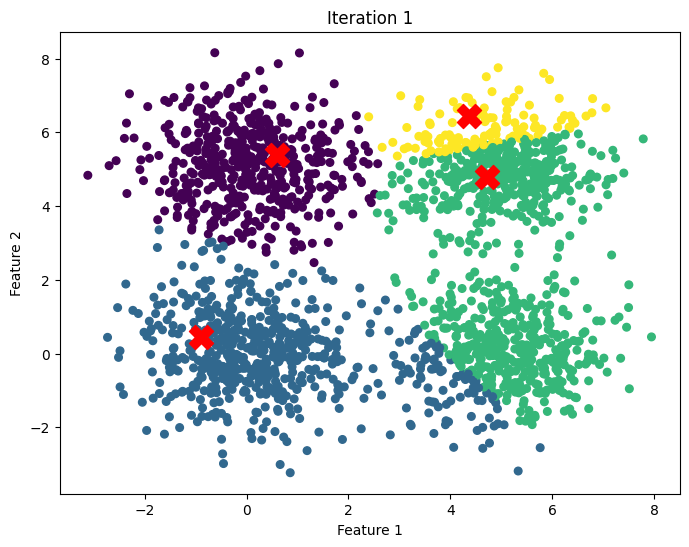

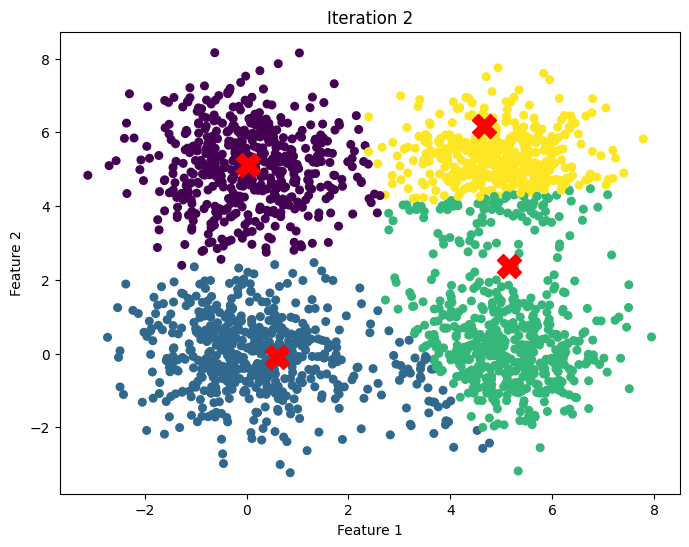

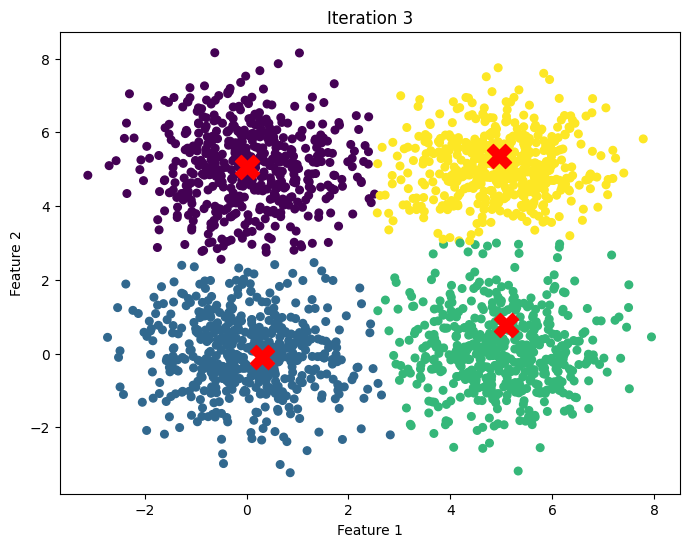

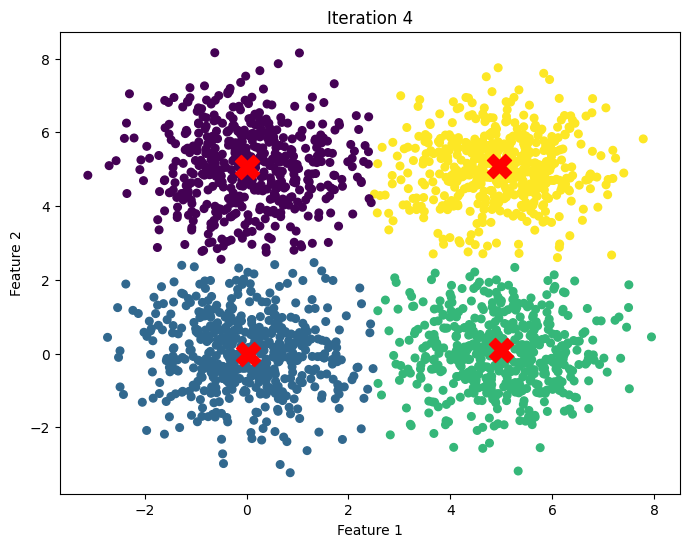

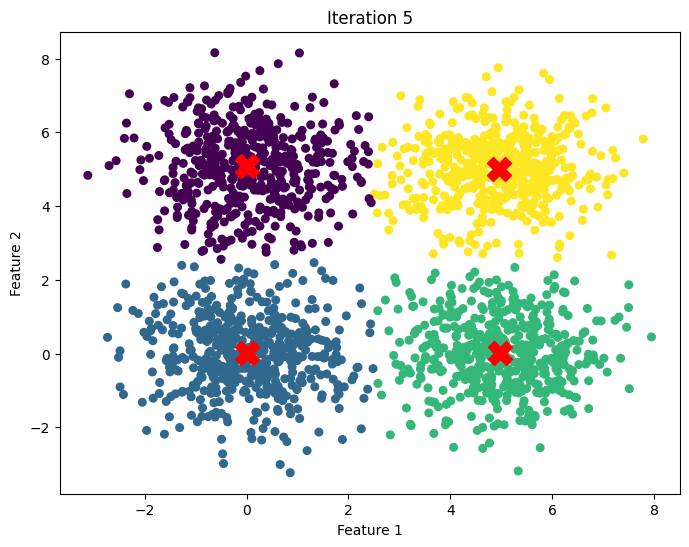

In [ ]:

# Step 1: Run KMeans with different n_clusters values and record final costs
n_clusters_list = [2, 3, 4, 6, 8, 10, 20]
final_costs = {}

for n_clusters in n_clusters_list:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    final_costs[n_clusters] = kmeans.costs[-1]

for n_clusters, cost in final_costs.items():
    print(f'{n_clusters} clusters: {cost}')

# Step 2: Plot clusters and centroids at each iteration
def plot_iterations(kmeans, X):
    for i in range(len(kmeans.centroids_history)):
        plt.figure(figsize=(8, 6))
        labels = kmeans.labels_history[i]
        centroids = kmeans.centroids_history[i]
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
        plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X')
        plt.title(f'Iteration {i + 1}')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()

# Plot iterations for n_clusters = 4
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

# Plot iterations
plot_iterations(kmeans, X)

##  PCA

In this part you will implement the PCA algorithm on the MNIST dataset.<br>
**As in the first part, your implementation will be based on the numpy package only.**

### **1. Useful packages**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml

### **2. Data**

Load the MNIST dataset from sklearn datasets.

In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


### **3. PCA**

Implement the PCA algorithm here.<br> Don't forget to center the data, i.e. make the mean of the columns of the dataset to 0.

In [ ]:
class PCA:
    def __init__(self):
        self.mean = None
        self.V = None

    def fit(self, X):
        # Center the data
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Compute the covariance matrix
        covariance_matrix = np.cov(X_centered, rowvar=False)

        # Compute eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        # Sort eigenvectors by decreasing eigenvalues
        sorted_idx = np.argsort(eigenvalues)[::-1]
        self.V = eigenvectors[:, sorted_idx]

    def transform(self, X, n_dimensions):
        # Center the data
        X_centered = X - self.mean

        # Project the data onto the principal components
        X_reduced = np.dot(X_centered, self.V[:, :n_dimensions])

        return X_reduced

Run the algorithm on MNIST dataset.

In [ ]:
pca = PCA()
pca.fit(X)

# transform the data to the top 2 principal components
X_reduced = pca.transform(X, 2)

Plot the data in the top 2 principal component space.

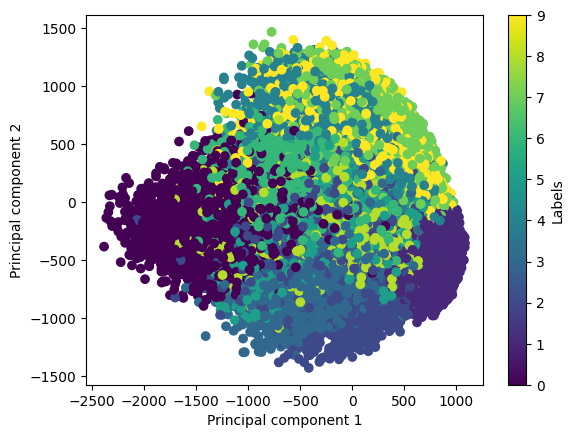

In [ ]:
y = [int(label) for label in y]
fig, ax = plt.subplots()
scatter = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')

cbar = fig.colorbar(scatter)
cbar.set_label('Labels')

ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')

plt.show()

As we showed in class, $V\in \mathbb{R}^{d\times r}$  is the matrix whose colmns are the top  $r$ eigenvectors of $X^TX$. That is, the eigenvectors that correspond to the  $r$ largest eigenvalues. <br>
In the cell below, Write a code that plots the two matrices $V^TV$ and $VV^T$.<br>
Explain the differences between the two matrices

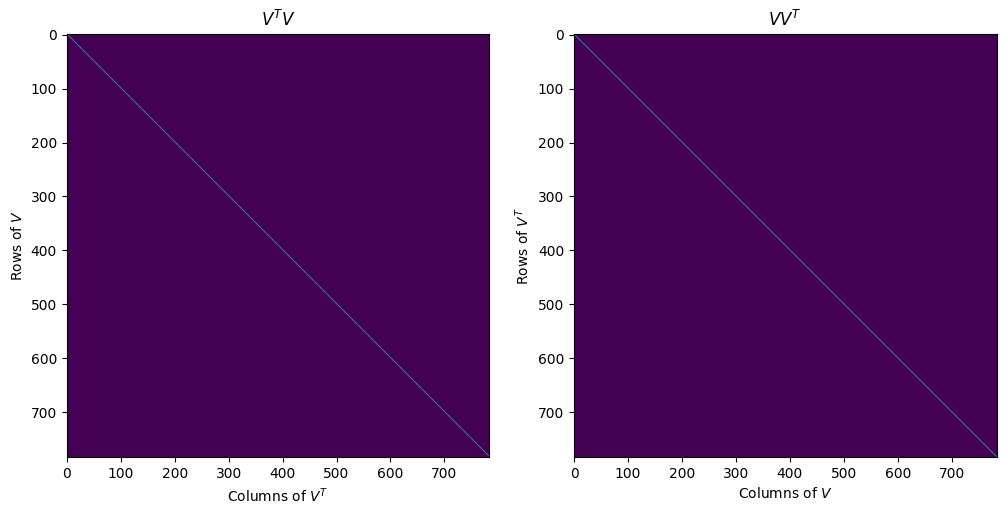

In [ ]:
# Extract the eigenvector matrix V
V = pca.V

# Calculate V^T V and V V^T
V_T_V = np.dot(V.T, V)
V_V_T = np.dot(V, V.T)

# Plot the matrices
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(V_T_V, cmap='viridis')
axs[0].set_title('$V^T V$')
axs[0].set_xlabel('Columns of $V^T$')
axs[0].set_ylabel('Rows of $V$')

axs[1].imshow(V_V_T, cmap='viridis')
axs[1].set_title('$V V^T$')
axs[1].set_xlabel('Columns of $V$')
axs[1].set_ylabel('Rows of $V^T$')

plt.show()

\
𝑉
𝑇
𝑉
 and
𝑉
𝑉
𝑇
  both depict important properties of the PCA eigenvector matrix
𝑉
V. The left plot of
𝑉
𝑇
𝑉
shows an identity matrix, indicating the orthonormality of the eigenvectors—each eigenvector is orthogonal to the others and has unit length. The right plot of
𝑉
𝑉
𝑇
  is a projection matrix, showing how the original data space is projected onto the space spanned by the top eigenvectors. Both matrices appear diagonal due to the dominance of principal components, emphasizing the data's variance concentration along principal directions.

Now write a function that projects a sample to a n-dimentional space  and **recontsturct** it to the original space.

In [ ]:
def pca_reconstruction(x, n_dimensions, pca):
    # Center the data
    x_centered = x - pca.mean

    # Project the data onto the top n_dimensions eigenvectors
    x_reduced = np.dot(x_centered, pca.V[:, :n_dimensions])

    # Reconstruct the data back to the original space
    x_reconstructed = np.dot(x_reduced, pca.V[:, :n_dimensions].T) + pca.mean

    return x_reconstructed



Perform the reconstruction above from spaces of dimensions: 3, 10, 100.<br>


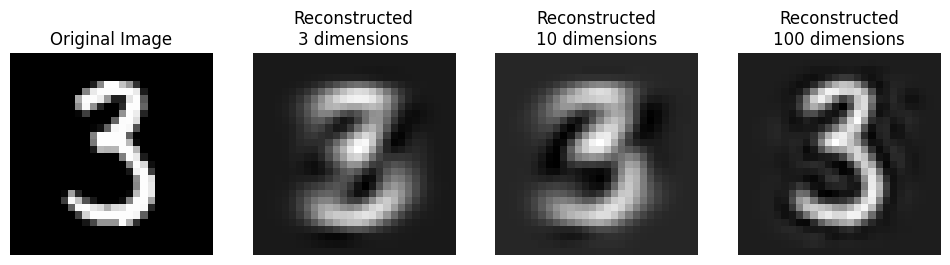

In [ ]:
from sklearn.datasets import fetch_openml
import random

def pca_reconstruction(x, n_dimensions, pca):
    # Center the data
    x_centered = x - pca.mean

    # Project the data onto the top n_dimensions eigenvectors
    x_reduced = np.dot(x_centered, pca.V[:, :n_dimensions])

    # Reconstruct the data back to the original space
    x_reconstructed = np.dot(x_reduced, pca.V[:, :n_dimensions].T) + pca.mean

    return x_reconstructed

# Fetch the MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

# Normalize the data
X = X / 255.0

# Apply PCA
class PCA:
    def __init__(self):
        self.V = None
        self.mean = None

    def fit(self, X):
        # Center the data
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Compute the covariance matrix
        covariance_matrix = np.cov(X_centered, rowvar=False)

        # Compute eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

        # Sort the eigenvectors by decreasing eigenvalues
        sorted_indices = np.argsort(eigenvalues)[::-1]
        self.V = eigenvectors[:, sorted_indices]

    def transform(self, X, n_dimensions):
        # Center the data
        X_centered = X - self.mean

        # Project the data onto the top n_dimensions eigenvectors
        X_reduced = np.dot(X_centered, self.V[:, :n_dimensions])

        return X_reduced

pca = PCA()
pca.fit(X)

# Sample a random image from the dataset
random_index = random.randint(0, X.shape[0] - 1)
original_image = X[random_index]

# Perform the reconstruction from spaces of dimensions 3, 10, 100
dimensions = [3, 10, 100]
reconstructed_images = []

for dim in dimensions:
    reconstructed_image = pca_reconstruction(original_image, dim, pca)
    reconstructed_images.append(reconstructed_image)

# Plot the original and reconstructed images
fig, axes = plt.subplots(1, 4, figsize=(12, 6))

# Original image
axes[0].imshow(original_image.reshape(28, 28), cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Reconstructed images
for i, dim in enumerate(dimensions):
    axes[i+1].imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    axes[i+1].set_title(f'Reconstructed\n{dim} dimensions')
    axes[i+1].axis('off')

plt.show()
